In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
# load the data and info and shape
data = pd.read_csv('data_final.csv')
print("The shape of the data is:",  data.shape)
print("******************************************")
print(" The columns in the data are : ", data.columns)
print("******************************************")
data.info()

The shape of the data is: (217, 8)
******************************************
 The columns in the data are :  Index(['title', 'authors', 'year', 'page_count', 'book_type', 'rating',
       'rating_count', 'review_count'],
      dtype='object')
******************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         217 non-null    object 
 1   authors       217 non-null    object 
 2   year          217 non-null    float64
 3   page_count    217 non-null    object 
 4   book_type     217 non-null    object 
 5   rating        217 non-null    float64
 6   rating_count  217 non-null    float64
 7   review_count  217 non-null    float64
dtypes: float64(4), object(4)
memory usage: 13.7+ KB


In [6]:
# check for the fill rate of each of the columns
def calculate_fill_rate(df, column_name):
  total_rows = len(df)
  non_null_count = df[column_name].count()
  fill_rate = (non_null_count / total_rows) * 100
  return fill_rate# check for any null values in the data

column_name = 'rating'# Columns name
fill_rate = calculate_fill_rate(data, column_name)# method call
print(f"Fill rate of column '{column_name}': {fill_rate:.2f}%")

Fill rate of column 'rating': 100.00%


In [7]:
# Type conversions in the data for our convenience
data['year'] = pd.to_datetime(data['year']).astype(np.int64)
data['rating_count'] = data['rating_count'].astype(np.int64)
data['review_count'] = data['review_count'].astype(np.int64)
data = data.drop(155)# During extraction, this index row has a value "Paperback" for the page_count feature, so removing that
data['page_count'] = data['page_count'].astype(np.int64)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 216 entries, 0 to 216
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         216 non-null    object 
 1   authors       216 non-null    object 
 2   year          216 non-null    int64  
 3   page_count    216 non-null    int64  
 4   book_type     216 non-null    object 
 5   rating        216 non-null    float64
 6   rating_count  216 non-null    int64  
 7   review_count  216 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 15.2+ KB


In [8]:
# Seperating out the object type, date time type, numerical type columns for future use if any
text_col_list = data.select_dtypes(include=['object']).columns.to_list()
time_col_list = ['year']
a = text_col_list + time_col_list
b = data.columns.tolist()
num_col_list = list(set(b) - set(a))

### Check for any correlation

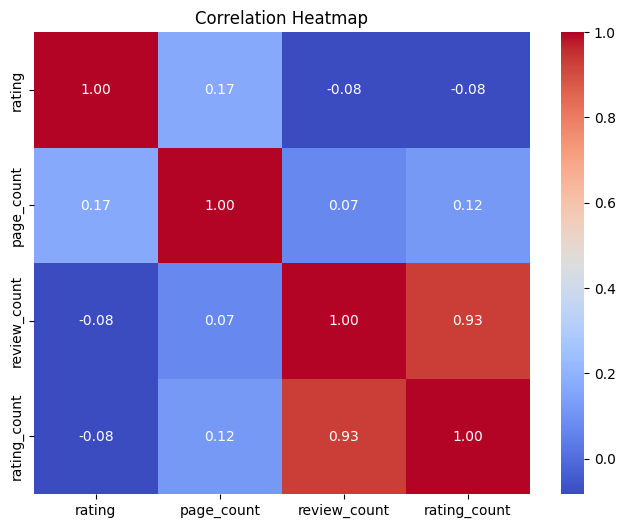

In [9]:
# corrlation heatmap for all variables
plt.figure(figsize=(8, 6))
sns.heatmap(data[num_col_list].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## EDA

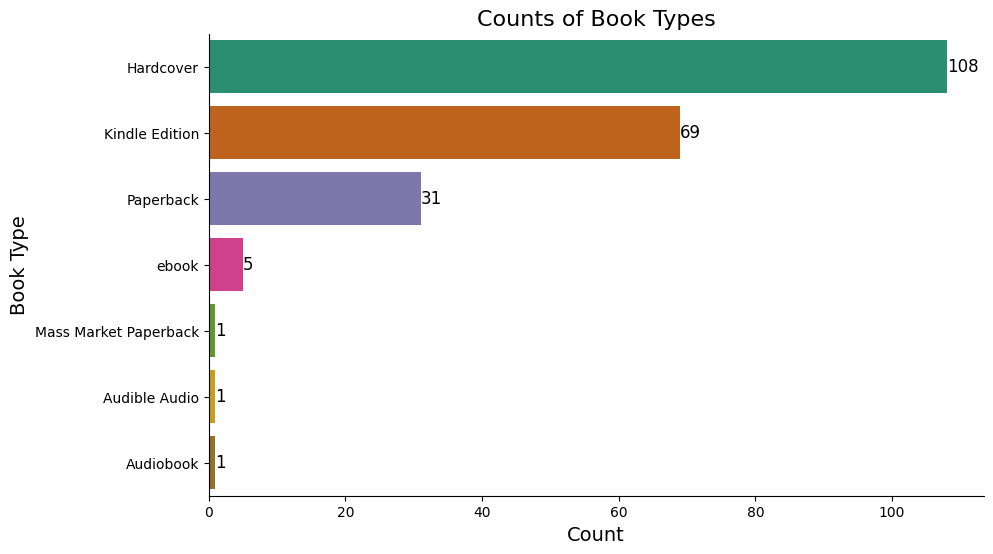

In [14]:
# Group by book type and get the count
book_type_counts = data['book_type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=book_type_counts.values, y=book_type_counts.index, palette='Dark2')

# Adding labels and title
plt.xlabel('Count', fontsize=14)
plt.ylabel('Book Type', fontsize=14)
plt.title('Counts of Book Types', fontsize=16)
for index, value in enumerate(book_type_counts):
  plt.text(value, index, str(value), ha='left', va='center', fontsize=12)# Adding counts on top of bars
plt.gca().spines[['top', 'right']].set_visible(False)# Removing top and right spines
plt.show()

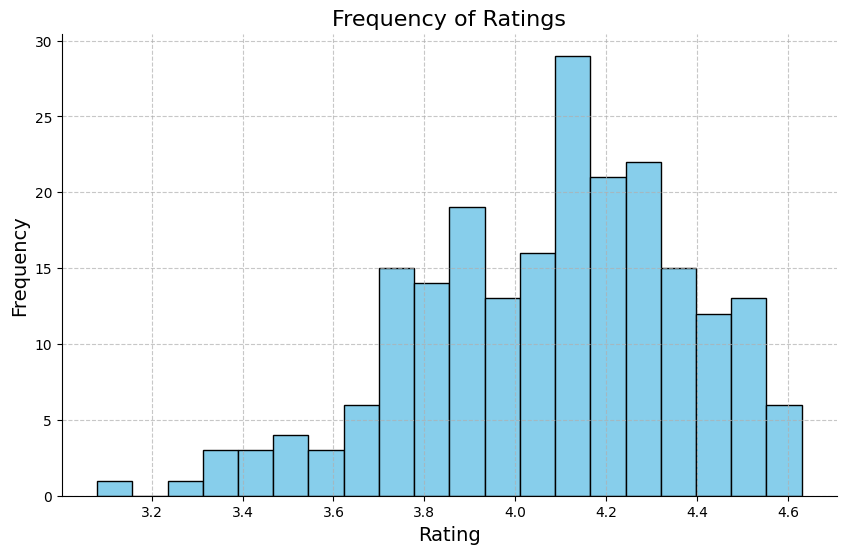

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(data['rating'], bins=20, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Frequency of Ratings', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)# Adding grid
plt.gca().spines[['top', 'right']].set_visible(False)# Removing top and right spines
plt.show()

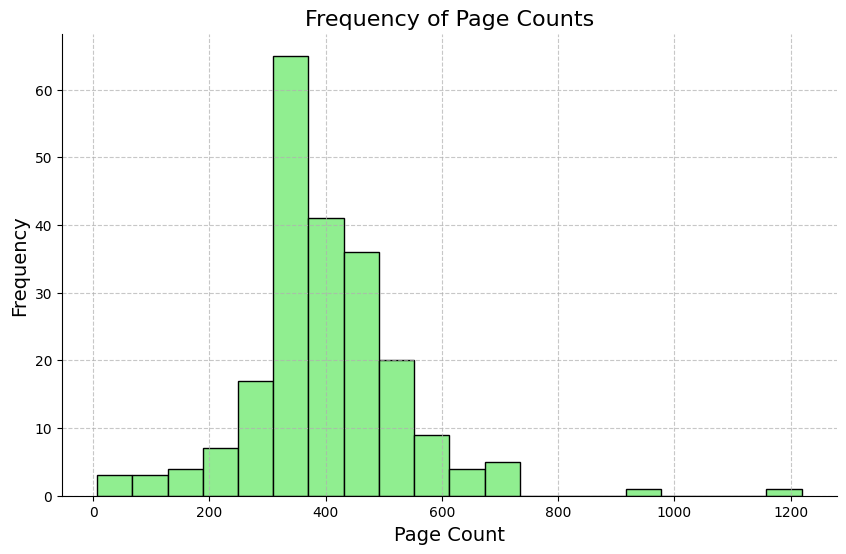

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(data['page_count'], bins=20, color='lightgreen', edgecolor='black')

# Adding labels and title
plt.xlabel('Page Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Frequency of Page Counts', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)# Adding grid
plt.gca().spines[['top', 'right']].set_visible(False)# Removing top and right spines
plt.show()

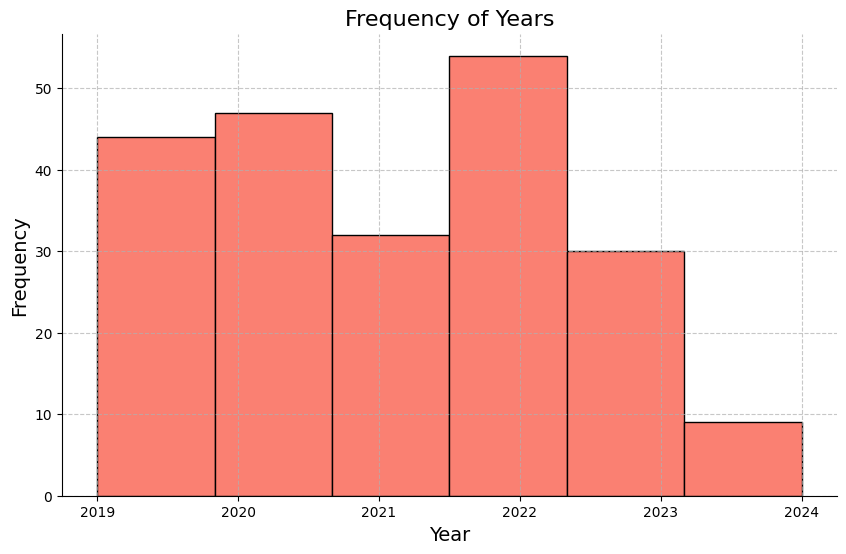

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(data['year'], bins=6, color='salmon', edgecolor='black')

# Adding labels and title
plt.xlabel('Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Frequency of Years', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)# Adding grid
plt.gca().spines[['top', 'right']].set_visible(False)# Removing top and right spines
plt.show()

Text(0.5, 0, 'year')

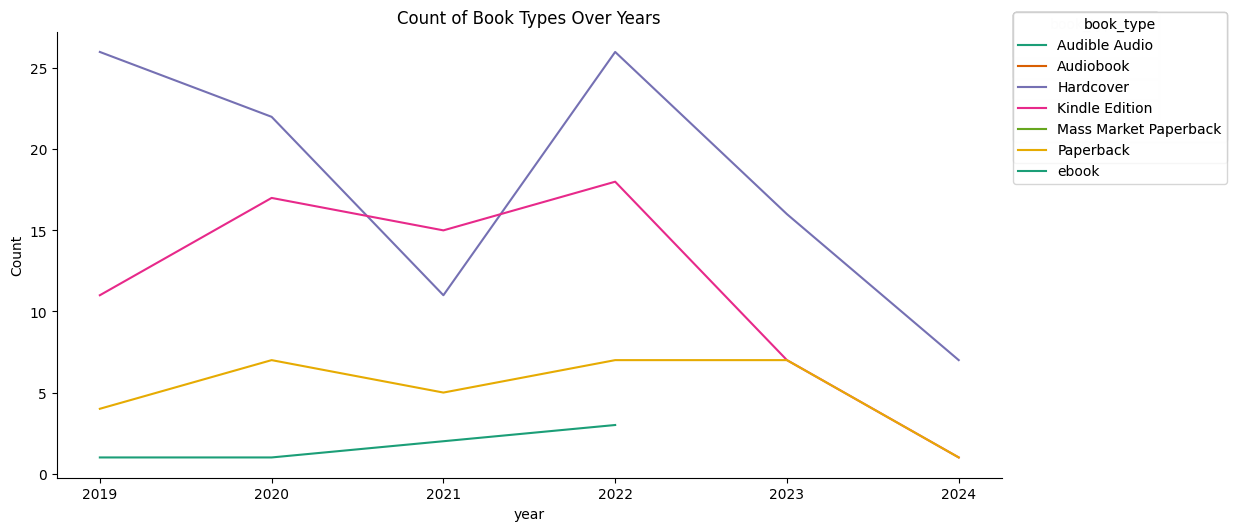

In [16]:
# year on year trend of different book types
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('book_type')):
  _plot_series(series, series_name, i)
  fig.legend(title='book_type', bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Book Types Over Years')
sns.despine(fig=fig, ax=ax, top=True, right=True)
plt.xlabel('year')

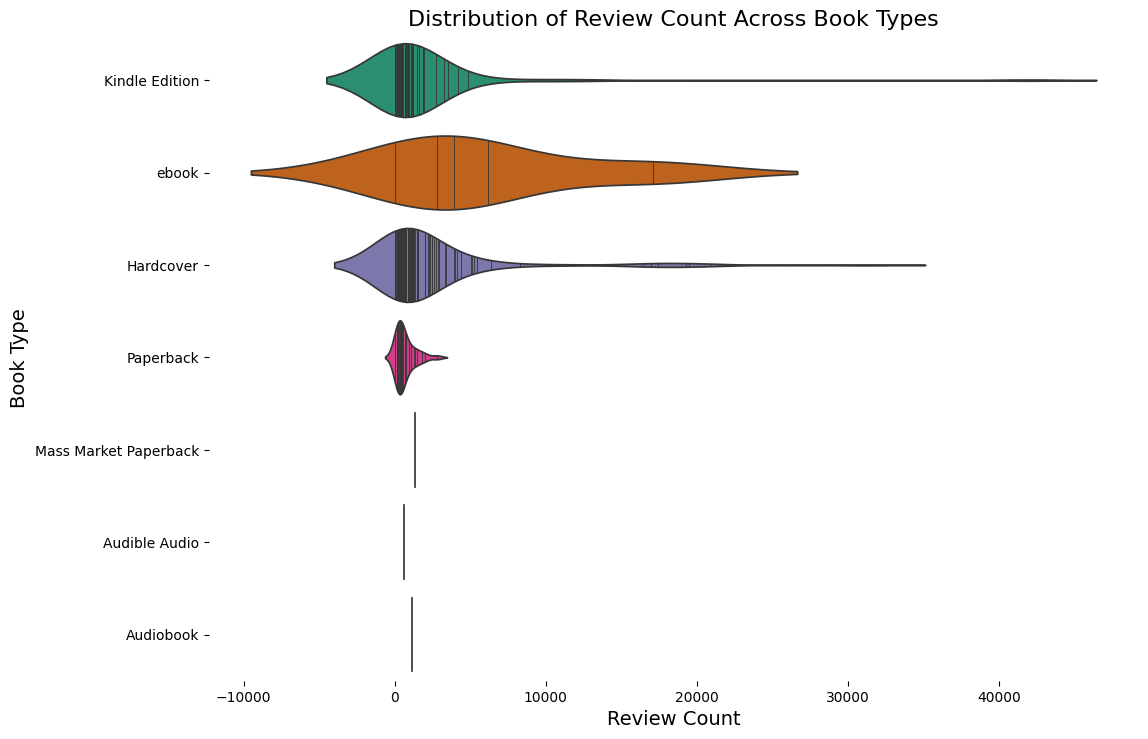

In [17]:
figsize = (12, 1.2 * len(data['book_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='review_count', y='book_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Add labels and titles
plt.xlabel('Review Count', fontsize=14)
plt.ylabel('Book Type', fontsize=14)
plt.title('Distribution of Review Count Across Book Types', fontsize=16)
plt.show()

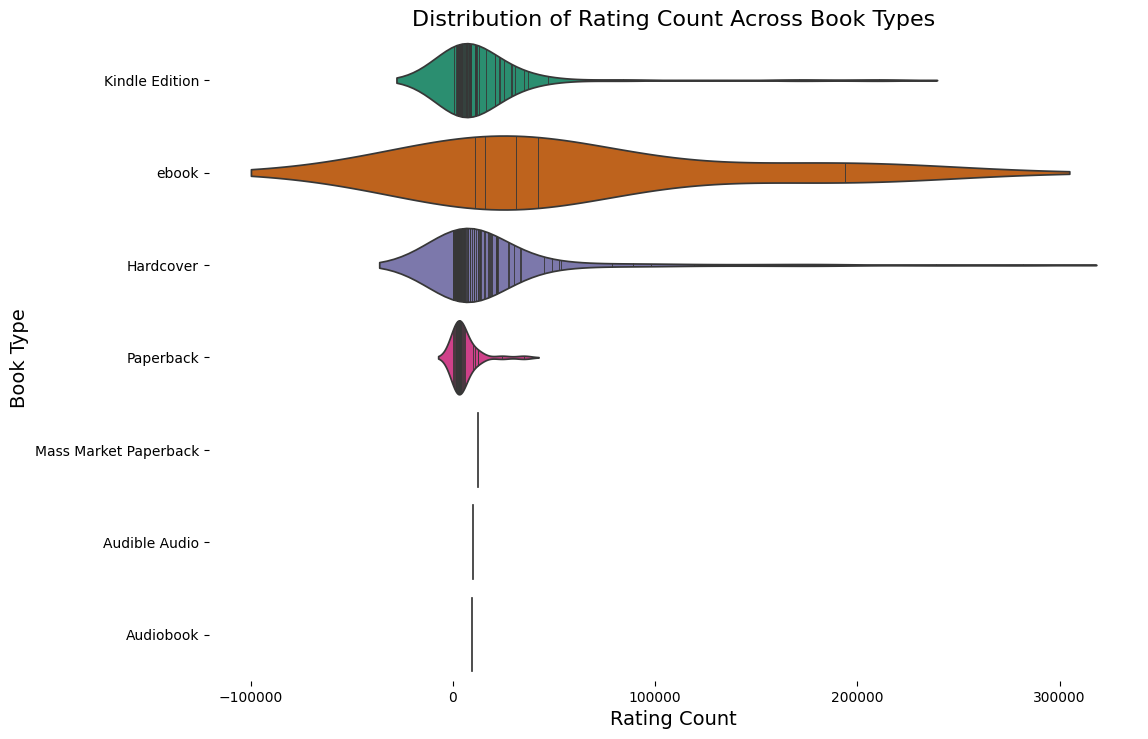

In [18]:
figsize = (12, 1.2 * len(data['book_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='rating_count', y='book_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Add labels and titles
plt.xlabel('Rating Count', fontsize=14)
plt.ylabel('Book Type', fontsize=14)
plt.title('Distribution of Rating Count Across Book Types', fontsize=16)
plt.show()

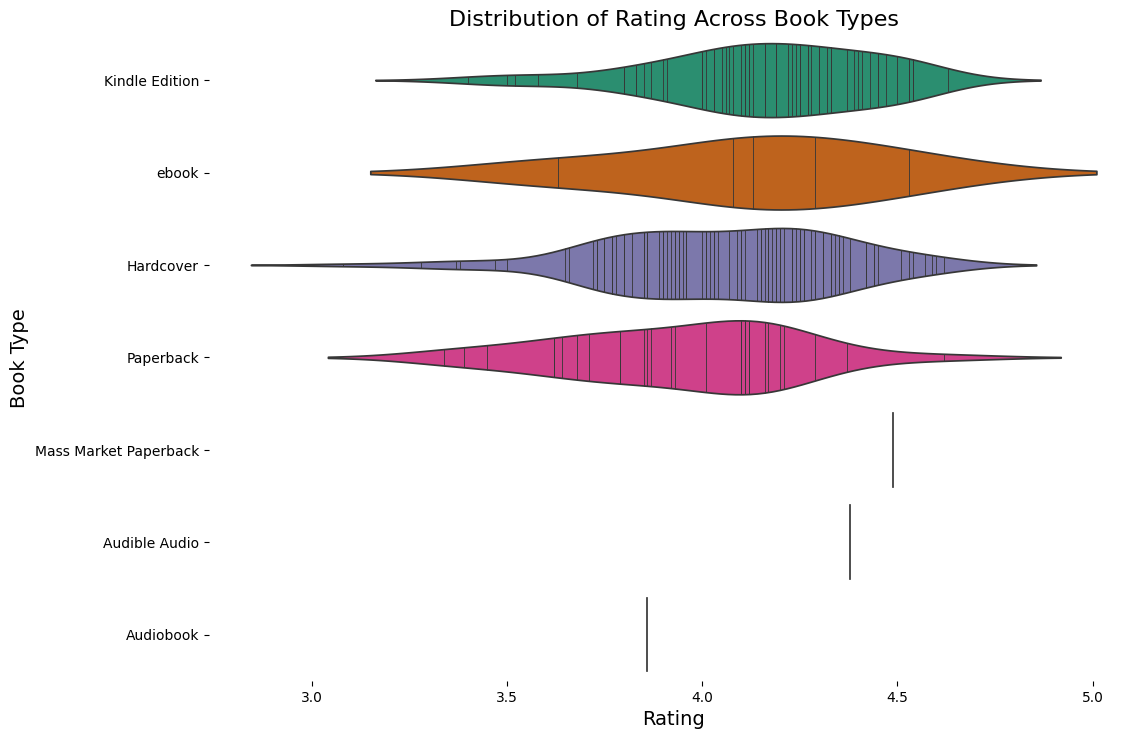

In [19]:
figsize = (12, 1.2 * len(data['book_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='rating', y='book_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Add labels and titles
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Book Type', fontsize=14)
plt.title('Distribution of Rating Across Book Types', fontsize=16)
plt.show()

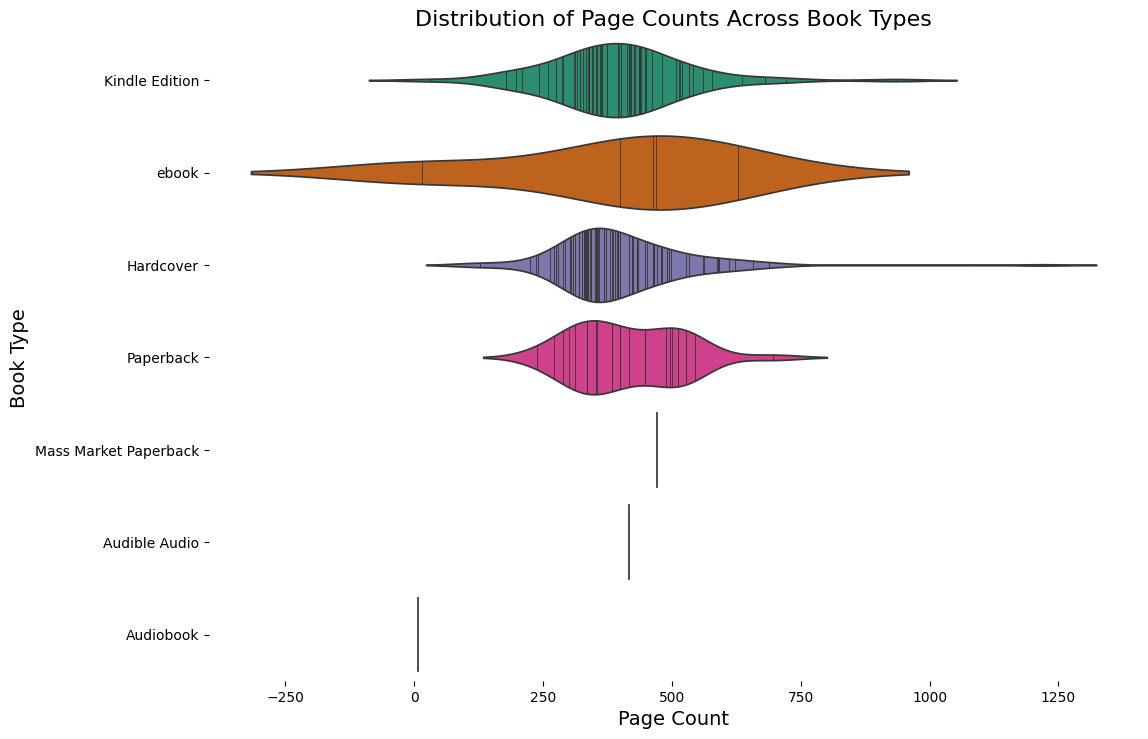

In [20]:
figsize = (12, 1.2 * len(data['book_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='page_count', y='book_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Add labels and titles
plt.xlabel('Page Count', fontsize=14)
plt.ylabel('Book Type', fontsize=14)
plt.title('Distribution of Page Counts Across Book Types', fontsize=16)
plt.show()

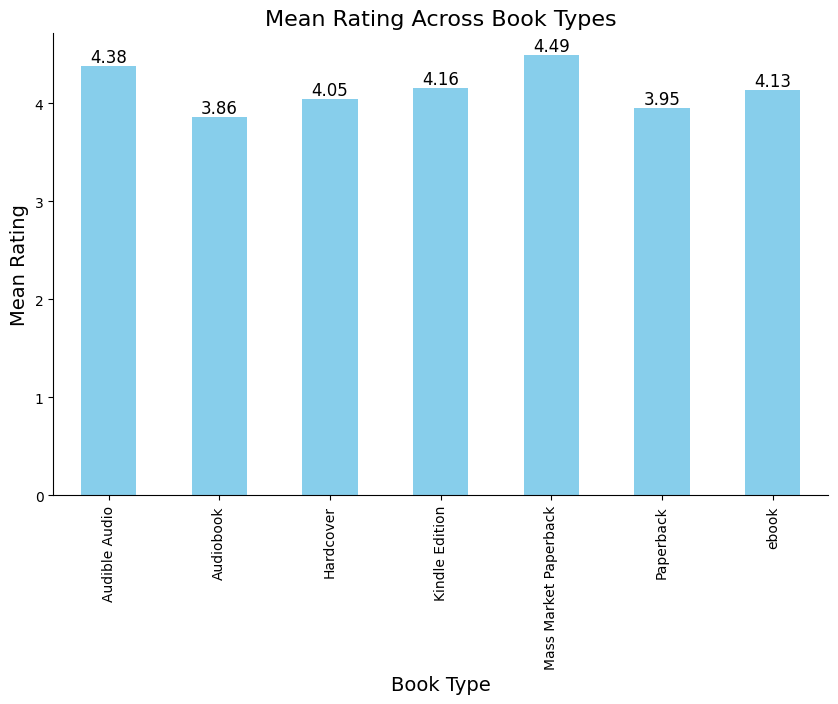

In [21]:
mean_ratings = data.groupby('book_type')['rating'].mean()# Group by book type and calculate mean rating
plt.figure(figsize=(10, 6))
mean_ratings.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Book Type', fontsize=14)
plt.ylabel('Mean Rating', fontsize=14)
plt.title('Mean Rating Across Book Types', fontsize=16)
for i, mean_rating in enumerate(mean_ratings):
  plt.text(i, mean_rating, f'{mean_rating:.2f}', ha='center', va='bottom', fontsize=12)# Adding the mean ratings on top of the bars
plt.gca().spines[['top', 'right']].set_visible(False)# Removing top and right spines
plt.show()

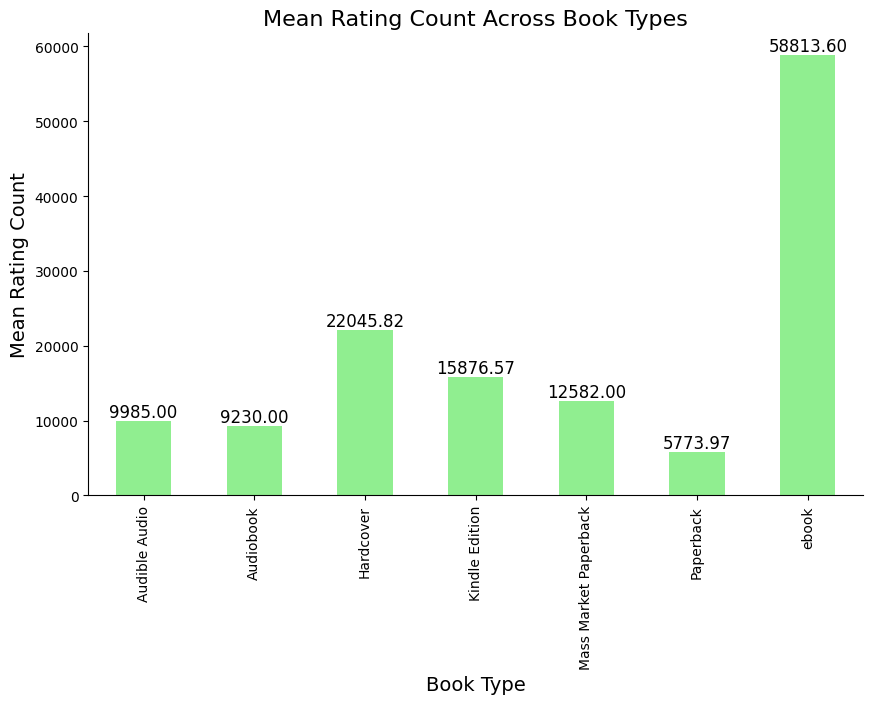

In [22]:
mean_rating_counts = data.groupby('book_type')['rating_count'].mean()# Group by book type and calculate mean rating count
plt.figure(figsize=(10, 6))
mean_rating_counts.plot(kind='bar', color='lightgreen')

# Adding labels and title
plt.xlabel('Book Type', fontsize=14)
plt.ylabel('Mean Rating Count', fontsize=14)
plt.title('Mean Rating Count Across Book Types', fontsize=16)
for i, mean_rating_count in enumerate(mean_rating_counts):
  plt.text(i, mean_rating_count, f'{mean_rating_count:.2f}', ha='center', va='bottom', fontsize=12)# Adding the mean rating counts on top of the bars
plt.gca().spines[['top', 'right']].set_visible(False)# Removing top and right spines
plt.show()

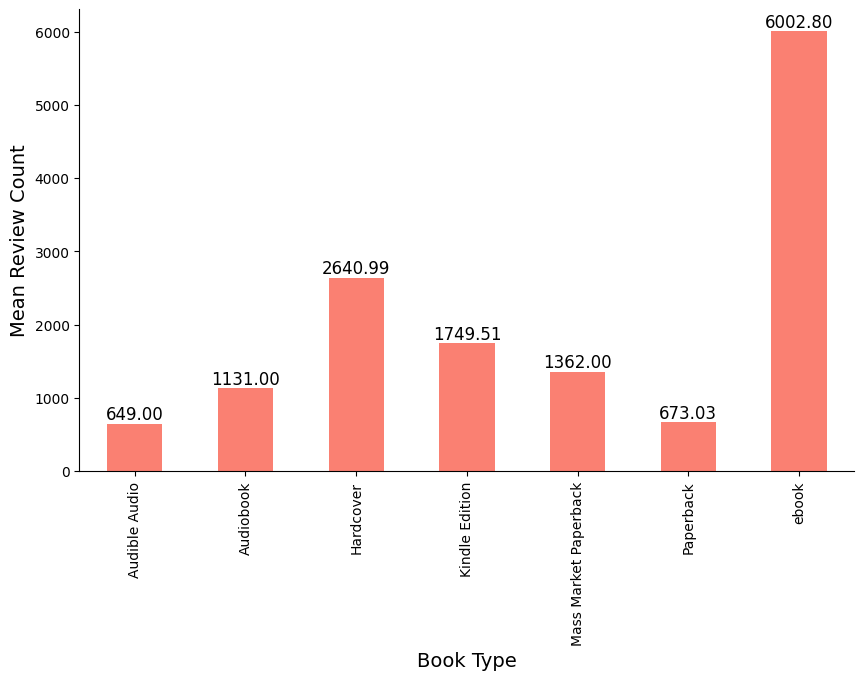

In [23]:
mean_review_counts = data.groupby('book_type')['review_count'].mean()# Group by book type and calculate mean review count
plt.figure(figsize=(10, 6))
mean_review_counts.plot(kind='bar', color='salmon')

# Adding labels and title
plt.xlabel('Book Type', fontsize=14)
plt.ylabel('Mean Review Count', fontsize=14)
for i, mean_review_count in enumerate(mean_review_counts):
  plt.text(i, mean_review_count, f'{mean_review_count:.2f}', ha='center', va='bottom', fontsize=12)# Adding the mean review counts on top of the bars
plt.gca().spines[['top', 'right']].set_visible(False)# Removing top and right spines
plt.show()

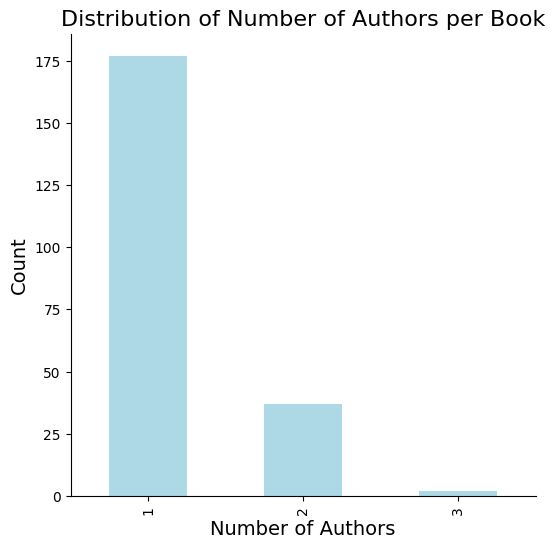

In [24]:
data['no_of_authors'] = data['authors'].str.split(',').str.len()# Number of Authors per Book
plt.figure(figsize=(6, 6))
data['no_of_authors'].value_counts().sort_index().plot(kind='bar', color='lightblue')

# Adding labels and title
plt.xlabel('Number of Authors', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Number of Authors per Book', fontsize=16)
plt.gca().spines[['top', 'right']].set_visible(False)# Removing top and right spines
plt.show()

# Binning some features to look into more insights

## Assumption 1 : Converting the Ratings feature to categorical feature where
+ if ratings is < 3.9 it is categorized as Average
+ if rating si more than 3.9, it is categorized as Good

In [25]:
# Convert ratings to categorical
bins = [0, 3.9, 5.0]  # Defining the bin edges
labels = ['Average', 'Good']  # Define the labels for each bin
data['rating_cat'] = pd.cut(data['rating'], bins=bins, labels=labels)

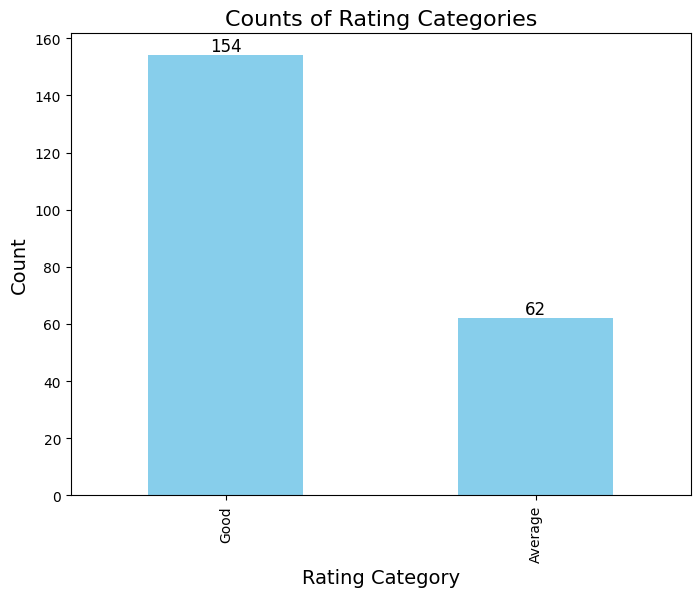

In [26]:
rating_cat_counts = data['rating_cat'].value_counts()# Number in each of the Rating Categorie
plt.figure(figsize=(8, 6))
rating_cat_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Rating Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Counts of Rating Categories', fontsize=16)
for i, count in enumerate(rating_cat_counts):
  plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)# Adding counts on top of each bar
plt.show()

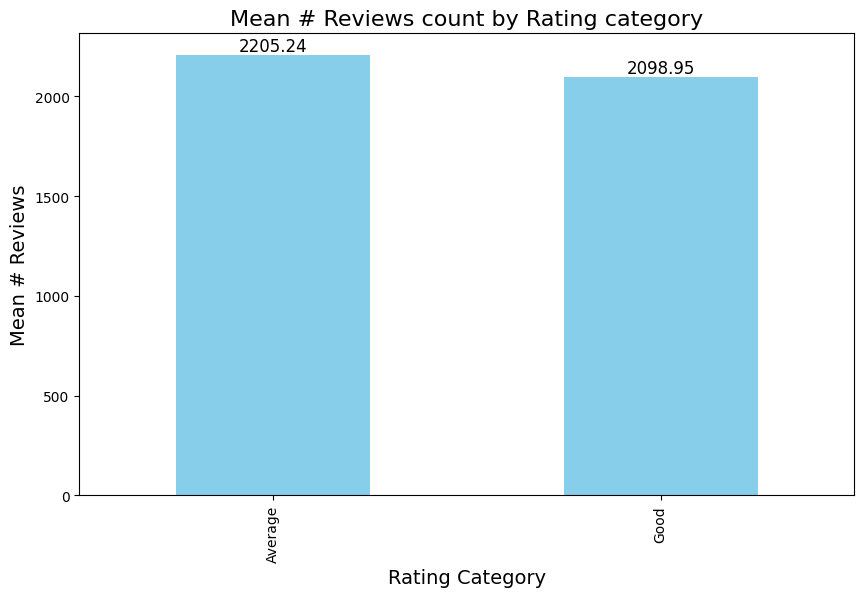

In [27]:
mean_reviews_by_rating = data.groupby('rating_cat')['review_count'].mean()# Group by rating and calculate mean reviews
rating_counts = data['rating_cat'].value_counts()
plt.figure(figsize=(10, 6))
mean_reviews_by_rating.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Rating Category', fontsize=14)
plt.ylabel('Mean # Reviews', fontsize=14)
plt.title('Mean # Reviews count by Rating category', fontsize=16)
for i, mean_review in enumerate(mean_reviews_by_rating):
  plt.text(i, mean_review, f'{mean_review:.2f}', ha='center', va='bottom', fontsize=12)
plt.show()

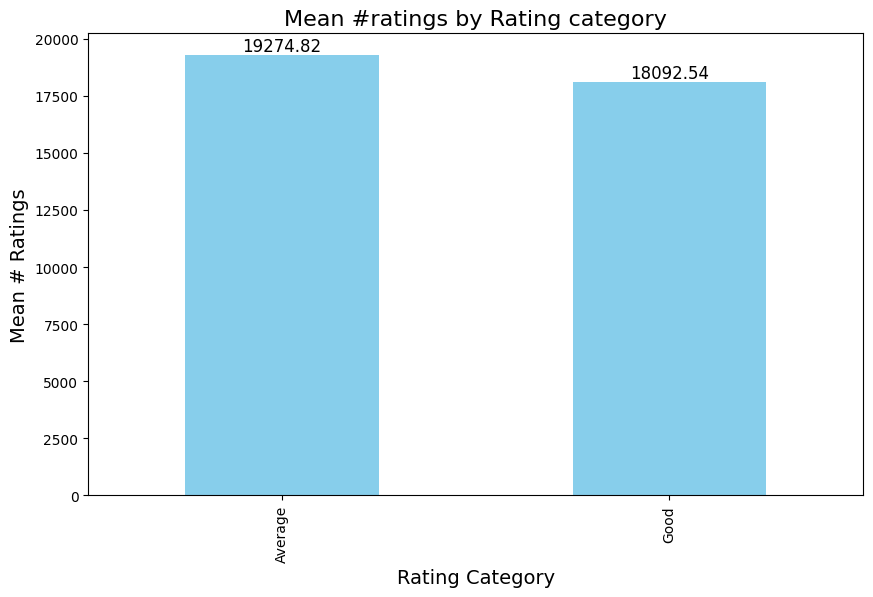

In [28]:
mean_ratings_by_rating = data.groupby('rating_cat')['rating_count'].mean()# Group by rating and calculate mean reviews
rating_counts = data['rating_cat'].value_counts()
plt.figure(figsize=(10, 6))
mean_ratings_by_rating.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Rating Category', fontsize=14)
plt.ylabel('Mean # Ratings', fontsize=14)
plt.title('Mean #ratings by Rating category', fontsize=16)
for i, mean_rating in enumerate(mean_ratings_by_rating):
  plt.text(i, mean_rating, f'{mean_rating:.2f}', ha='center', va='bottom', fontsize=12)
plt.show()

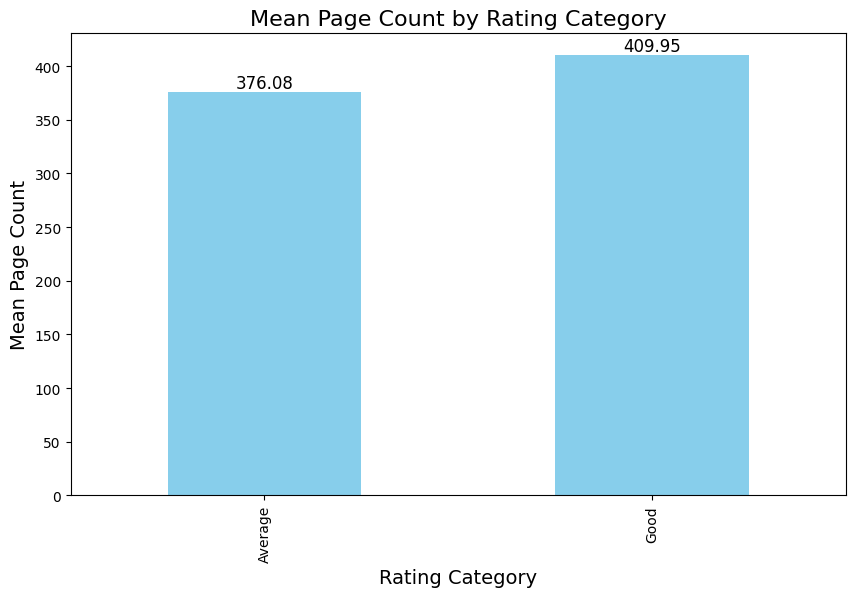

In [29]:
rating_counts = data['rating_cat'].value_counts()
page_counts_by_rating = data.groupby('rating_cat')['page_count'].mean()# Mean Page Count by Rating Category
plt.figure(figsize=(10, 6))
page_counts_by_rating.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Rating Category', fontsize=14)
plt.ylabel('Mean Page Count', fontsize=14)
plt.title('Mean Page Count by Rating Category', fontsize=16)
for i, page_count in enumerate(page_counts_by_rating):
  plt.text(i, page_count, f'{page_count:.2f}', ha='center', va='bottom', fontsize=12)
plt.show()

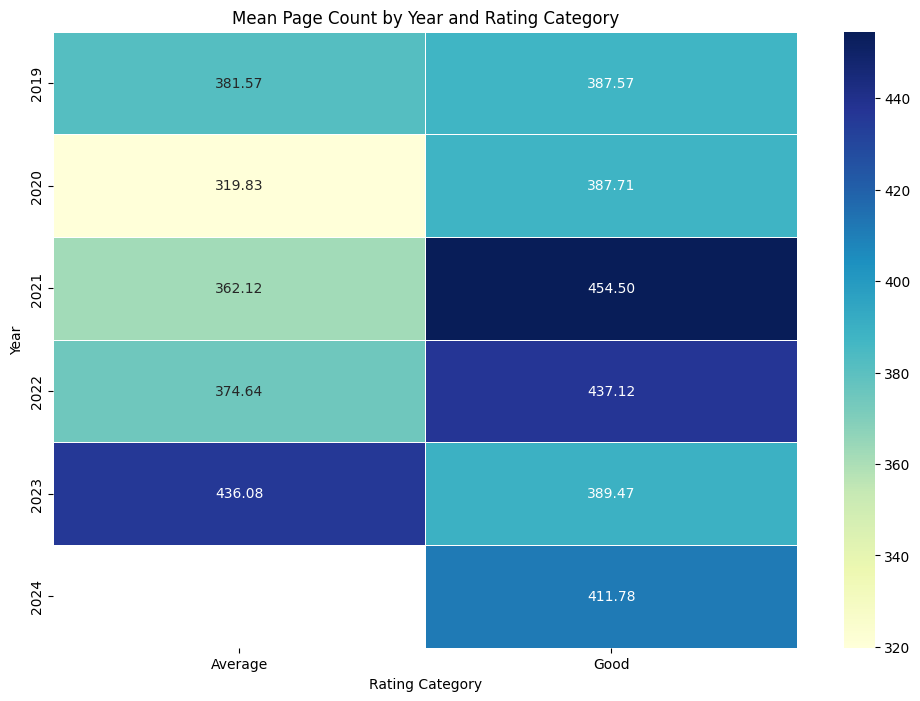

In [30]:
pivot_table = data.pivot_table(index='year', columns='rating_cat', values='page_count', aggfunc='mean')# Mean Page Count by Year and Rating Category

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Mean Page Count by Year and Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Year')
plt.show()

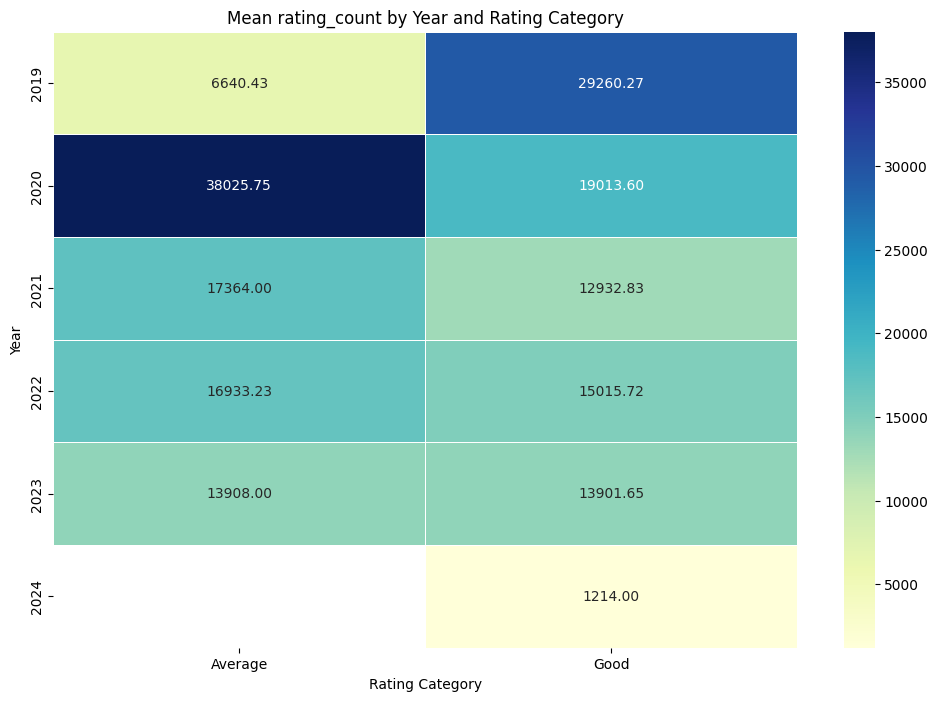

In [31]:
pivot_table = data.pivot_table(index='year', columns='rating_cat', values='rating_count', aggfunc='mean')# Mean rating_count by Year and Rating Category

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Mean rating_count by Year and Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Year')
plt.show()

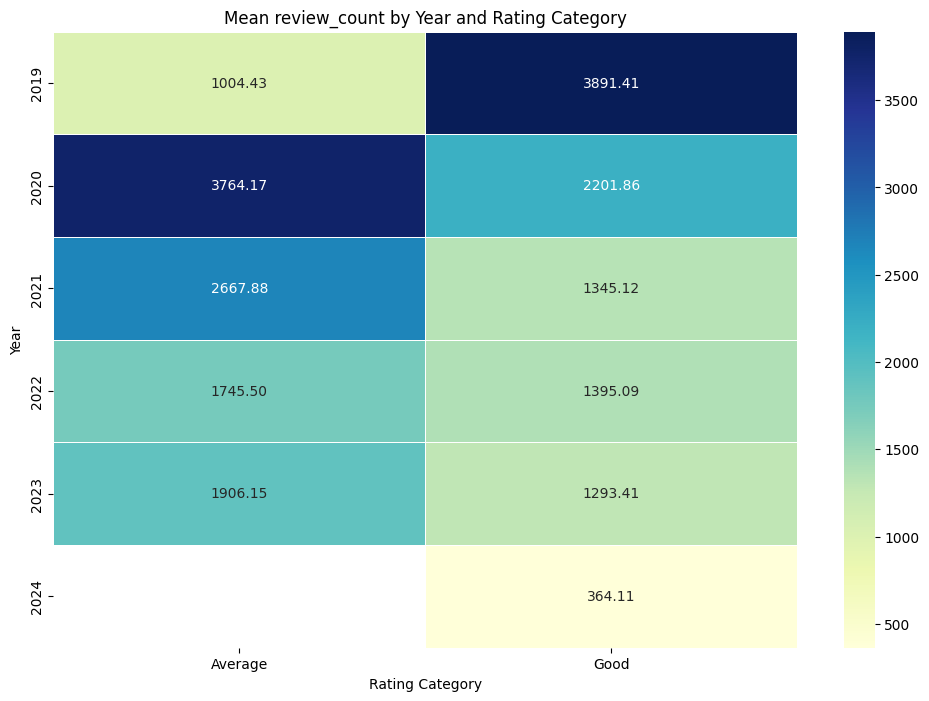

In [32]:
pivot_table = data.pivot_table(index='year', columns='rating_cat', values='review_count', aggfunc='mean')# Mean review_count by Year and Rating Category

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Mean review_count by Year and Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Year')
plt.show()

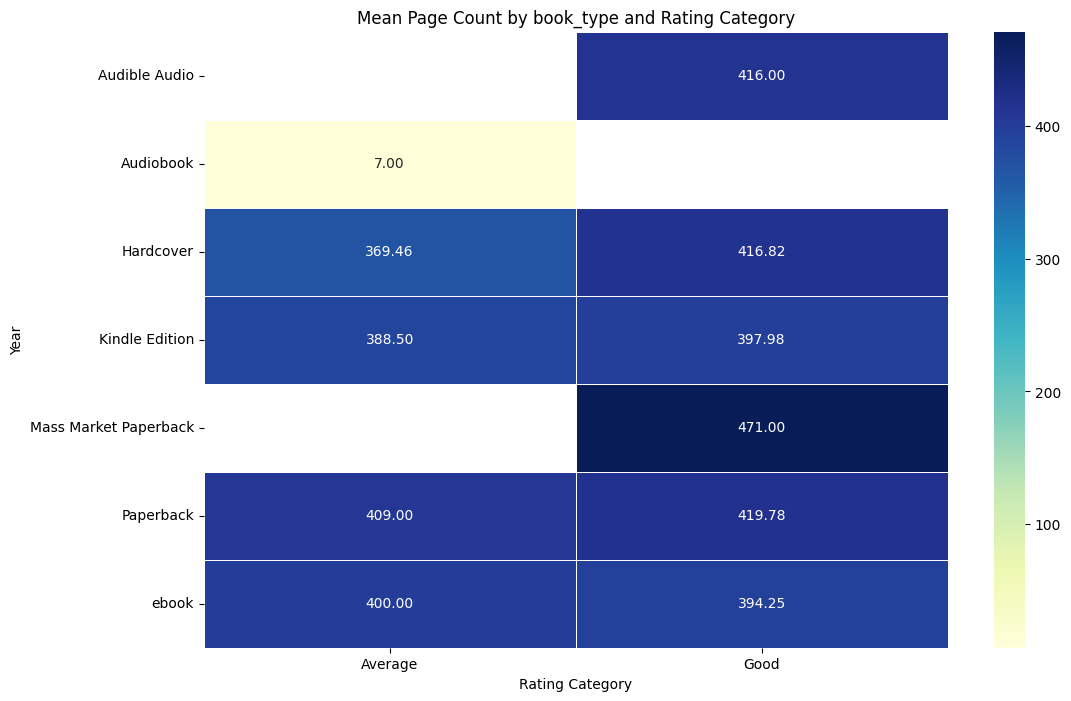

In [33]:
pivot_table = data.pivot_table(index='book_type', columns='rating_cat', values='page_count', aggfunc='mean')#Mean Page Count by book_type and Rating Category

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Mean Page Count by book_type and Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Year')
plt.show()

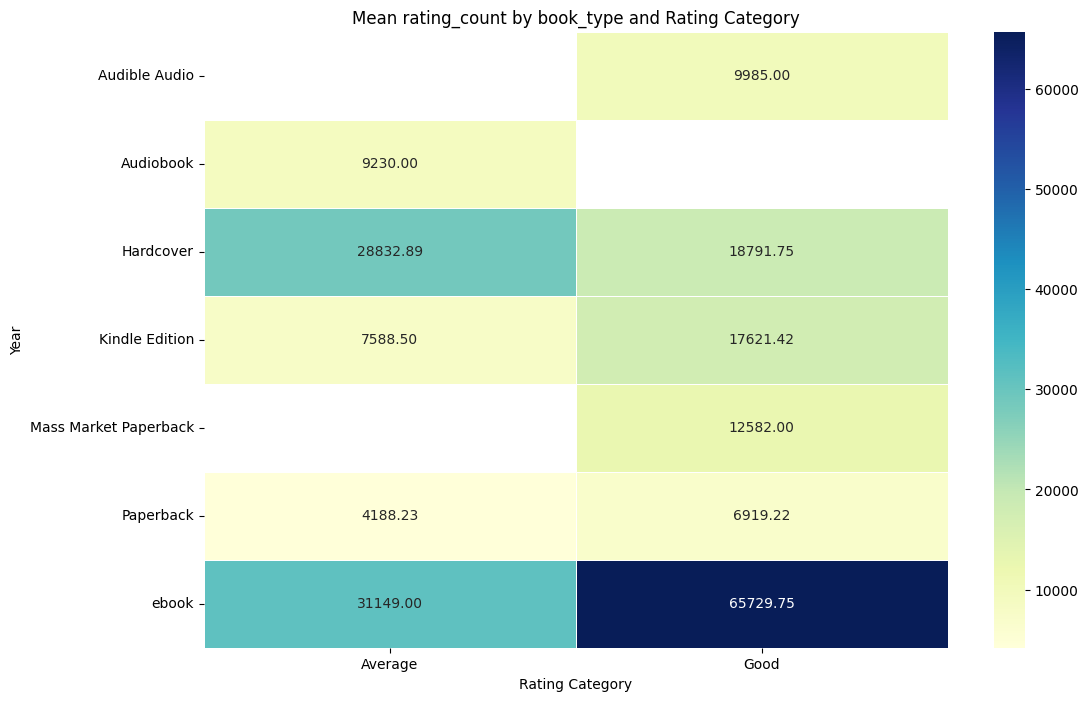

In [34]:
pivot_table = data.pivot_table(index='book_type', columns='rating_cat', values='rating_count', aggfunc='mean')# Mean rating_count by book_type and Rating Category

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Mean rating_count by book_type and Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Year')
plt.show()

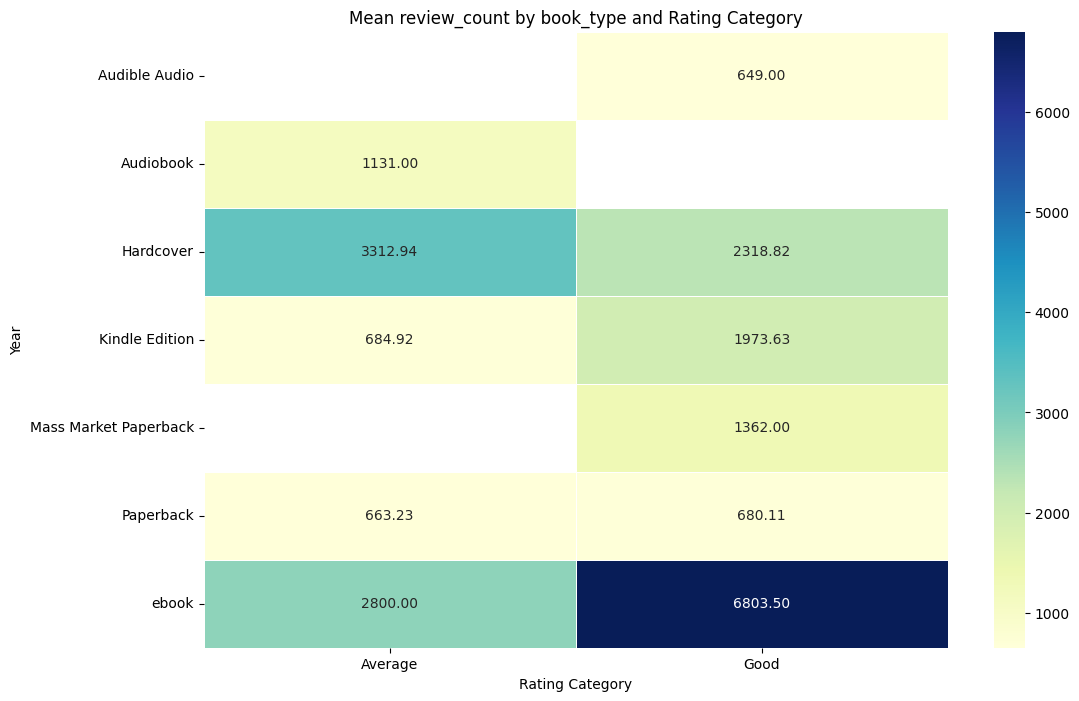

In [35]:
pivot_table = data.pivot_table(index='book_type', columns='rating_cat', values='review_count', aggfunc='mean')# Mean review_count by book_type and Rating Category

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Mean review_count by book_type and Rating Category')
plt.xlabel('Rating Category')
plt.ylabel('Year')
plt.show()

## Assumption 2 : Converting the page_count feature to categorical feature where
+ if page_count is < 100 it is categorized as short
+ if page_count si >=100 and less than 400, it is categorized as Medium-Length
+ if page_count is >=400, and less than 1220, it is categorized as long books

In [36]:
# Convert ratings to categorical
bins = [0, 100, 400, 1220]  # Defining the bin edges
labels = ['Short Books', 'Medium-Length Books', 'Long Books']  # Defined the labels for each bin
data['page_count_cat'] = pd.cut(data['page_count'], bins=bins, labels=labels)

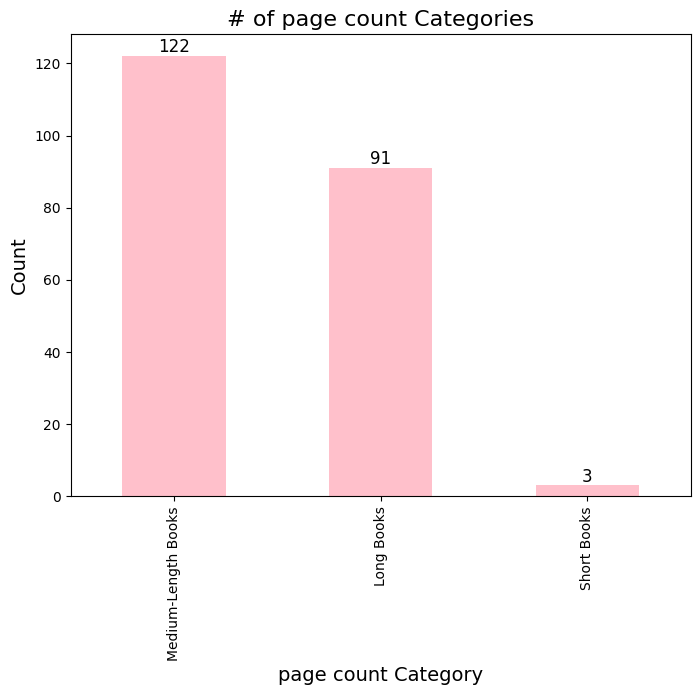

In [37]:
page_count_cat_counts = data['page_count_cat'].value_counts()# Number of # of page count Categories
plt.figure(figsize=(8, 6))
page_count_cat_counts.plot(kind='bar', color='pink')
plt.xlabel('page count Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('# of page count Categories', fontsize=16)
for i, count in enumerate(page_count_cat_counts):
  plt.text(i, count, str(count), ha='center', va='bottom', fontsize=12)# Adding counts on top of each bar
plt.show()

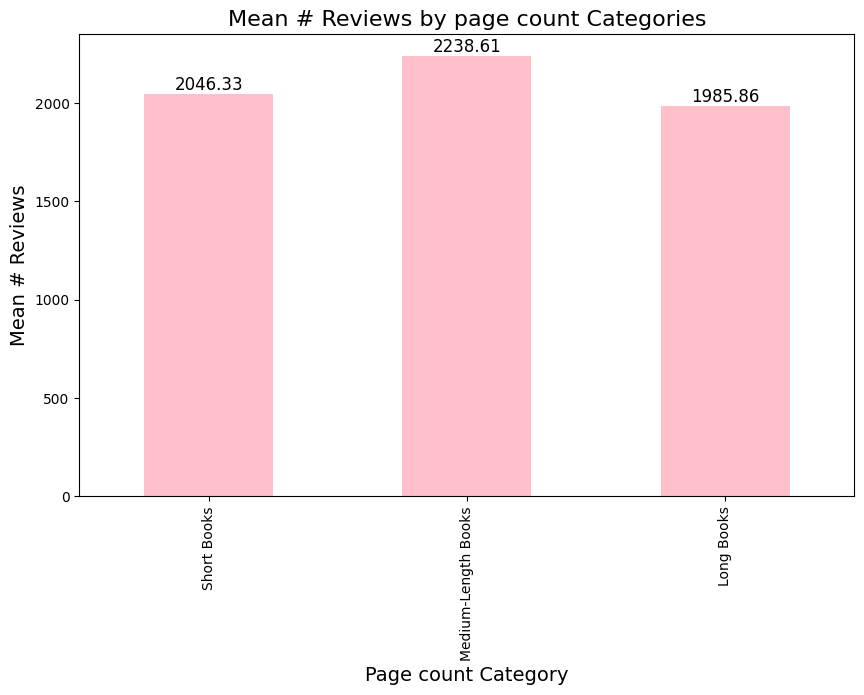

In [38]:
mean_reviews_by_page_count = data.groupby('page_count_cat')['review_count'].mean()# Group by page count category and calculate mean of  # reviews
page_counts = data['page_count_cat'].value_counts()
plt.figure(figsize=(10, 6))
mean_reviews_by_page_count.plot(kind='bar', color='pink')

# Adding labels and title
plt.xlabel('Page count Category', fontsize=14)
plt.ylabel('Mean # Reviews', fontsize=14)
plt.title('Mean # Reviews by page count Categories', fontsize=16)
for i, mean_review in enumerate(mean_reviews_by_page_count):
  plt.text(i, mean_review, f'{mean_review:.2f}', ha='center', va='bottom', fontsize=12)
plt.show()

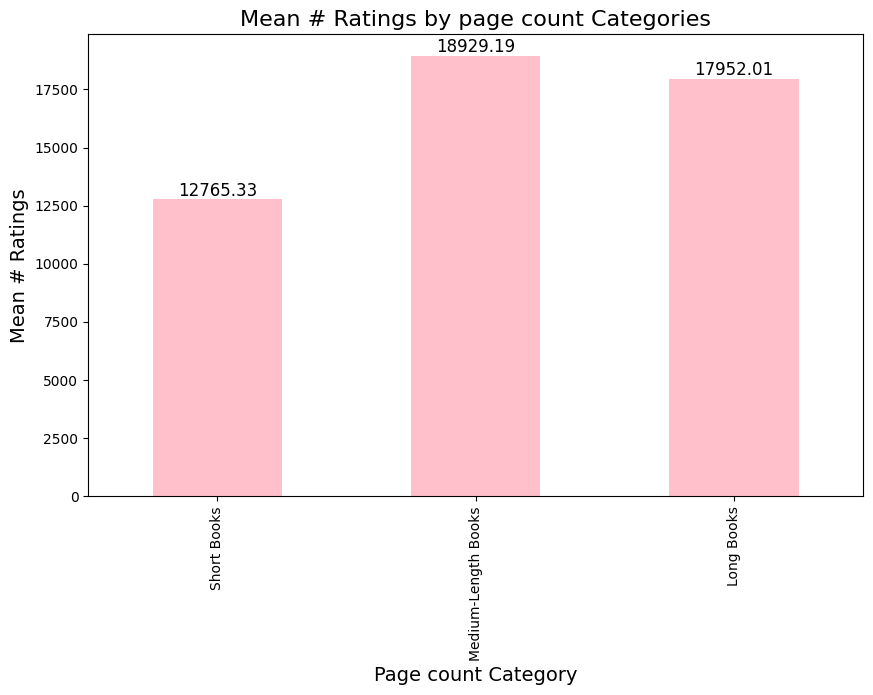

In [39]:
mean_ratings_by_page_count = data.groupby('page_count_cat')['rating_count'].mean()# Group by page count and calculate mean of #ratings
rating_counts = data['page_count_cat'].value_counts()
plt.figure(figsize=(10, 6))
mean_ratings_by_page_count.plot(kind='bar', color='pink')

# Adding labels and title
plt.xlabel('Page count Category', fontsize=14)
plt.ylabel('Mean # Ratings', fontsize=14)
plt.title('Mean # Ratings by page count Categories', fontsize=16)
for i, mean_rating in enumerate(mean_ratings_by_page_count):
  plt.text(i, mean_rating, f'{mean_rating:.2f}', ha='center', va='bottom', fontsize=12)
plt.show()

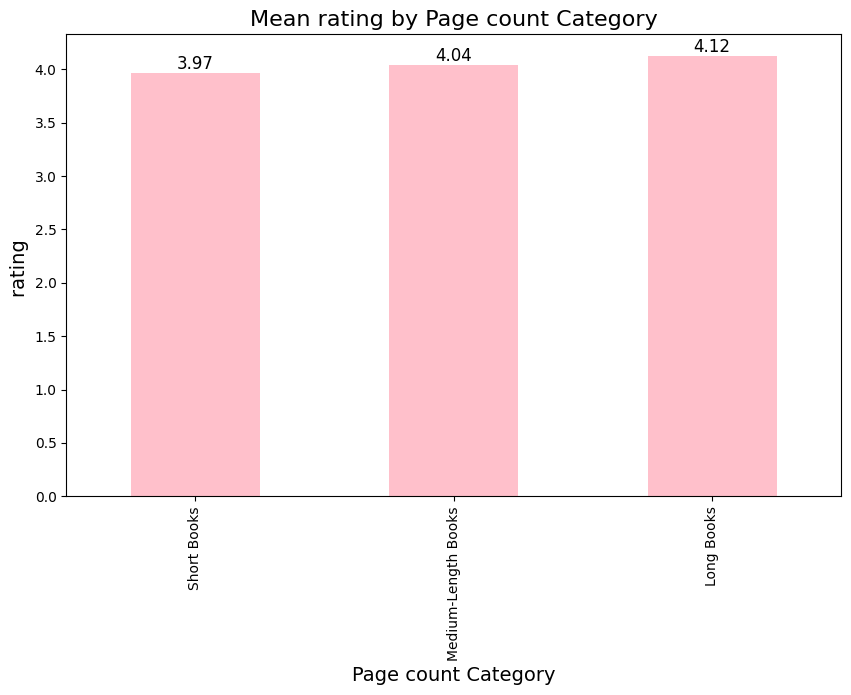

In [40]:
rating_counts = data['page_count_cat'].value_counts()
page_counts_by_rating = data.groupby('page_count_cat')['rating'].mean()# Mean rating by Page count Category
plt.figure(figsize=(10, 6))
page_counts_by_rating.plot(kind='bar', color='pink')

# Adding labels and title
plt.xlabel('Page count Category', fontsize=14)
plt.ylabel('rating ', fontsize=14)
plt.title('Mean rating by Page count Category', fontsize=16)
for i, page_count in enumerate(page_counts_by_rating):
  plt.text(i, page_count, f'{page_count:.2f}', ha='center', va='bottom', fontsize=12)
plt.show()

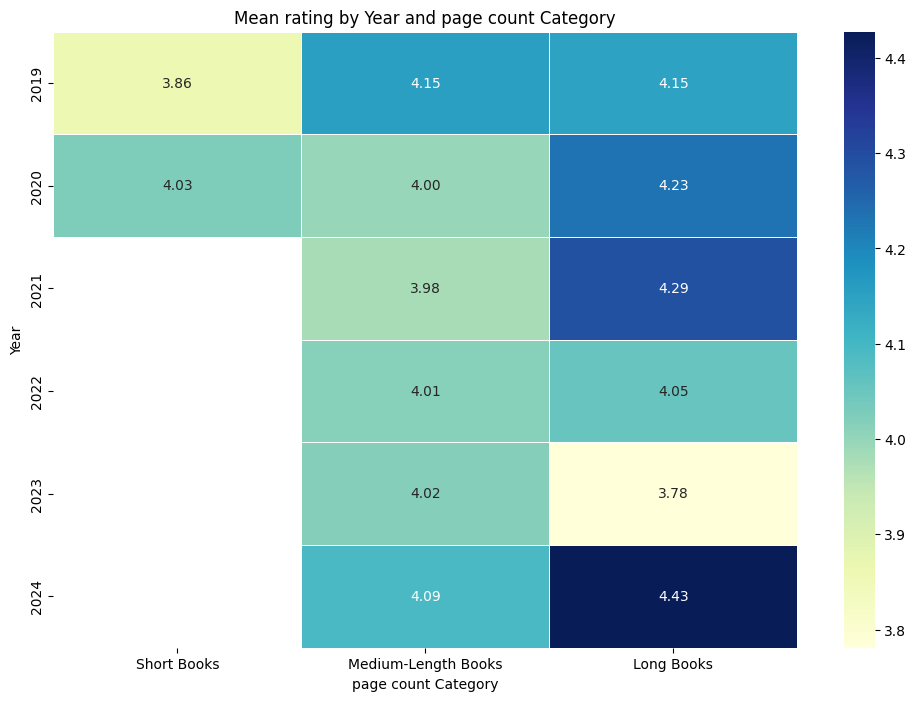

In [41]:
pivot_table = data.pivot_table(index='year', columns='page_count_cat', values='rating', aggfunc='mean')# Mean rating by Year and page count Category

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Mean rating by Year and page count Category')
plt.xlabel('page count Category')
plt.ylabel('Year')
plt.show()

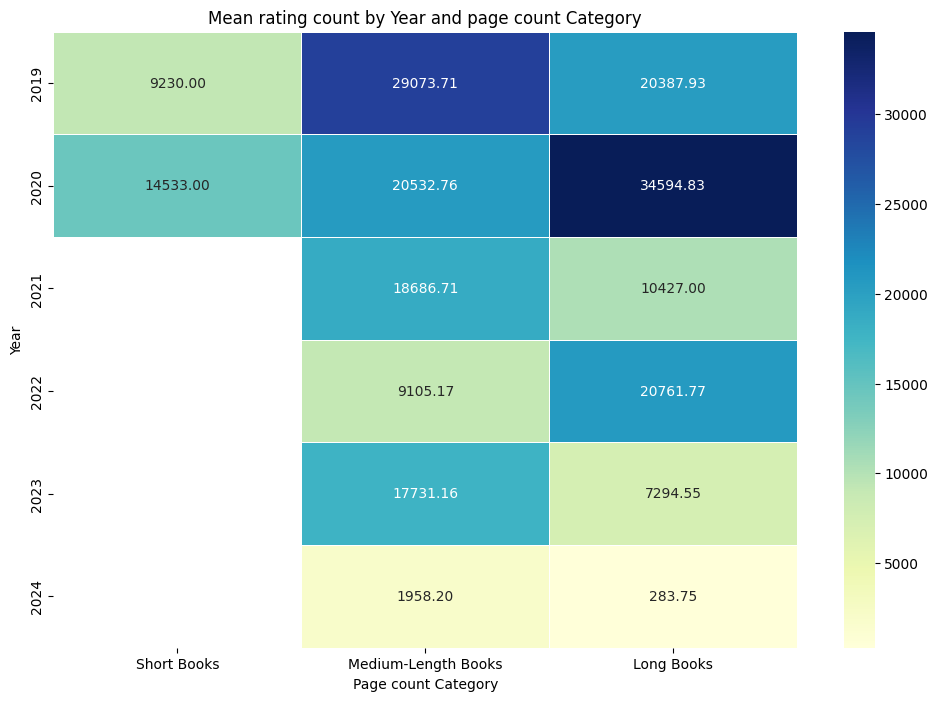

In [42]:
pivot_table = data.pivot_table(index='year', columns='page_count_cat', values='rating_count', aggfunc='mean')# Mean rating count by Year and page count Category

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Mean rating count by Year and page count Category')
plt.xlabel('Page count Category')
plt.ylabel('Year')
plt.show()

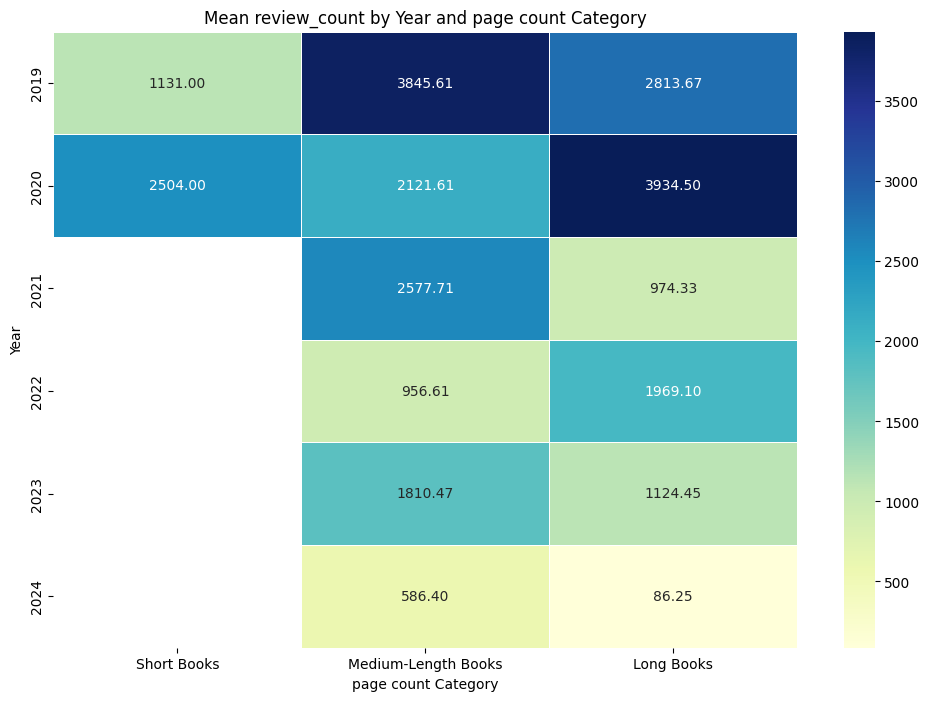

In [43]:
pivot_table = data.pivot_table(index='year', columns='page_count_cat', values='review_count', aggfunc='mean')# Mean review_count by Year and page count Category

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Mean review_count by Year and page count Category')
plt.xlabel('page count Category')
plt.ylabel('Year')
plt.show()

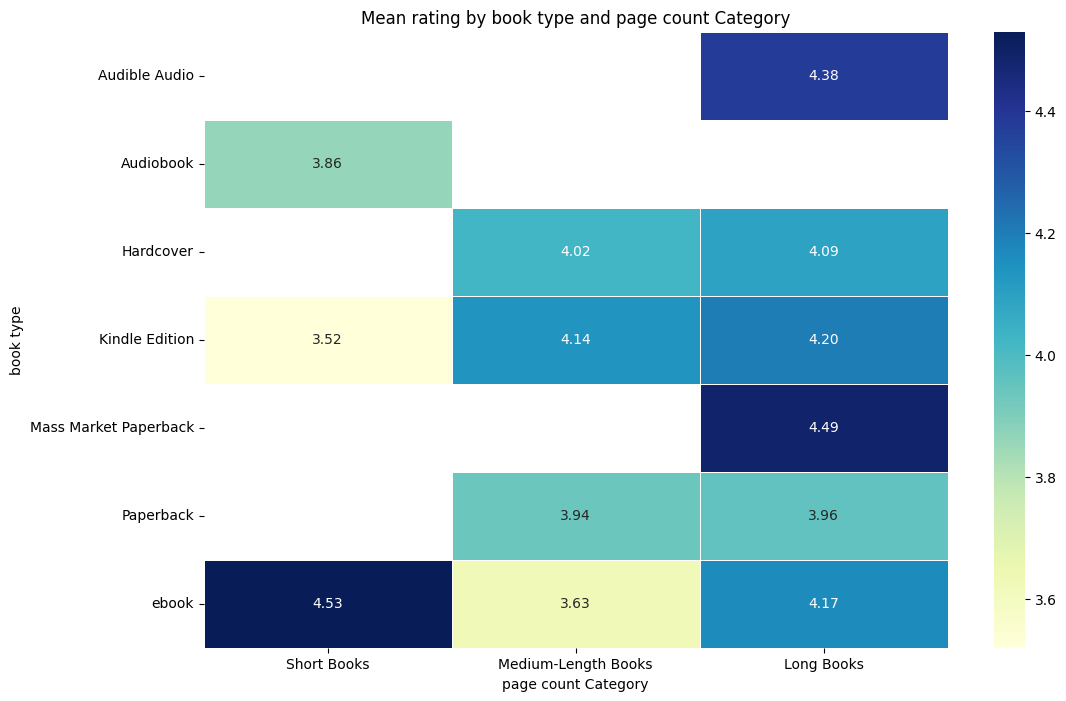

In [44]:
pivot_table = data.pivot_table(index='book_type', columns='page_count_cat', values='rating', aggfunc='mean')# Mean rating by book type and page count Category

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Mean rating by book type and page count Category')
plt.xlabel('page count Category')
plt.ylabel('book type')
plt.show()

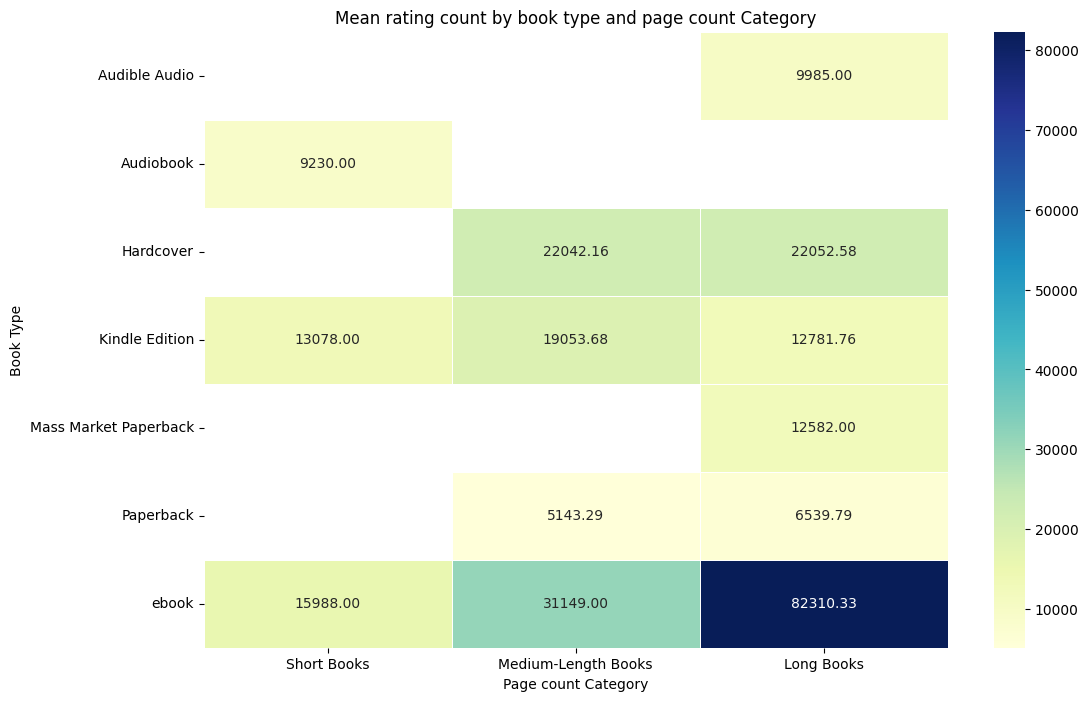

In [45]:
pivot_table = data.pivot_table(index='book_type', columns='page_count_cat', values='rating_count', aggfunc='mean')# Mean rating count by book type and page count Category

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Mean rating count by book type and page count Category')
plt.xlabel('Page count Category')
plt.ylabel('Book Type')
plt.show()

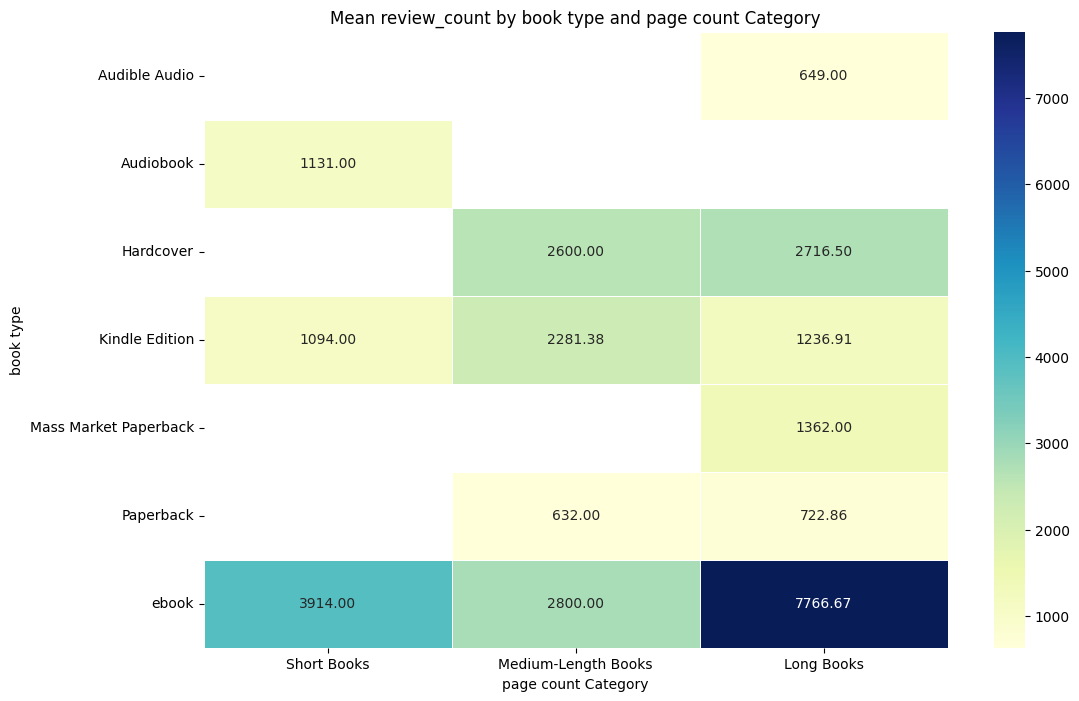

In [46]:
pivot_table = data.pivot_table(index='book_type', columns='page_count_cat', values='review_count', aggfunc='mean')# Mean review_count by book type and page count Category

# Plotting heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('Mean review_count by book type and page count Category')
plt.xlabel('page count Category')
plt.ylabel('book type')
plt.show()

In [47]:
sorted_data = data.sort_values(by='rating', ascending=False)[:5]# top 5 books by rating
sorted_data[['title', 'rating']]

,title,rating
32,"God of War (Legacy of Gods, #6)",4.63
121,"Our Bodies, Their Battlefields: War Through th...",4.62
4,"Rhythm of War (The Stormlight Archive, #4)",4.62
88,"War Lord (The Saxon Stories, #13)",4.60
167,The Long March Home: A World War II Novel of t...,4.59


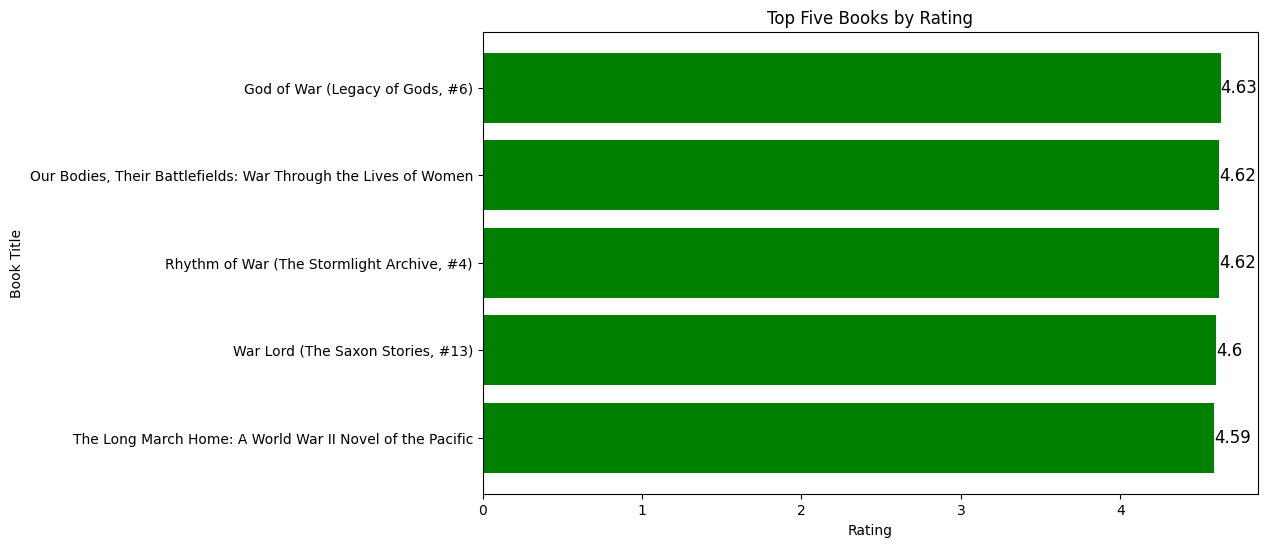

In [48]:
top_five_books = sorted_data[['title', 'rating']]
book_titles = top_five_books['title'].tolist()
ratings = top_five_books['rating'].tolist()
plt.figure(figsize=(10, 6))
plt.barh(book_titles, ratings, color='green')
plt.xlabel('Rating')
plt.ylabel('Book Title')
plt.title('Top Five Books by Rating')
for index, value in enumerate(ratings):
  plt.text(value, index, str(value), ha='left', va='center', fontsize=12)# Adding counts on top of bars
plt.gca().invert_yaxis()
plt.show()

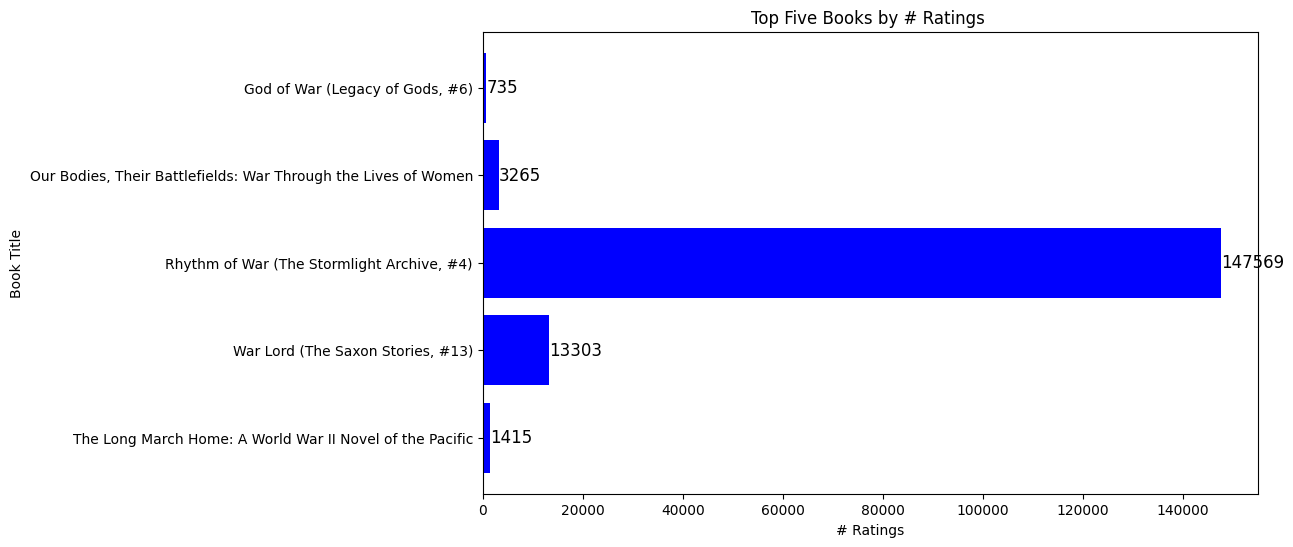

In [49]:
top_five_books = sorted_data[['title', 'rating_count']]
book_titles = top_five_books['title'].tolist()
ratings_count = top_five_books['rating_count'].tolist()
plt.figure(figsize=(10, 6))
plt.barh(book_titles, ratings_count, color='blue')
plt.xlabel('# Ratings')
plt.ylabel('Book Title')
plt.title('Top Five Books by # Ratings ')
for index, value in enumerate(ratings_count):
  plt.text(value, index, str(value), ha='left', va='center', fontsize=12)# Adding counts on top of bars
plt.gca().invert_yaxis()
plt.show()

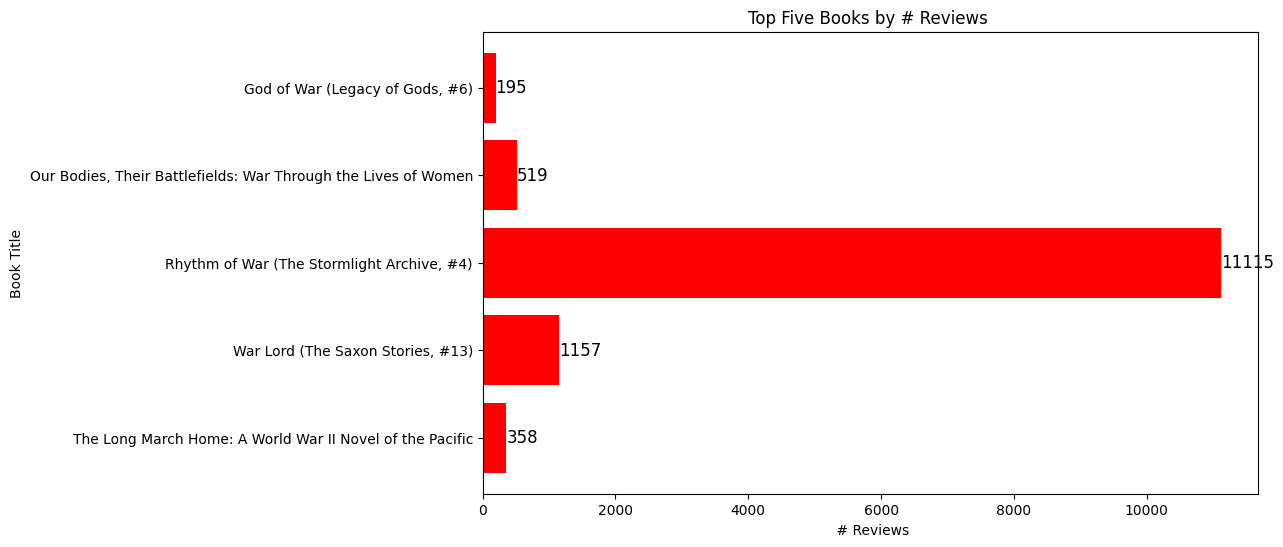

In [50]:
top_five_books = sorted_data[['title', 'review_count']]
book_titles = top_five_books['title'].tolist()
review_count = top_five_books['review_count'].tolist()
plt.figure(figsize=(10, 6))
plt.barh(book_titles, review_count, color='red')
plt.xlabel(' # Reviews')
plt.ylabel('Book Title')
plt.title('Top Five Books by # Reviews ')
for index, value in enumerate(review_count):
  plt.text(value, index, str(value), ha='left', va='center', fontsize=12)# Adding counts on top of bars
plt.gca().invert_yaxis()
plt.show()